In [1]:
from rdkit import Chem
import re

[16:41:43] Enabling RDKit 2019.09.3 jupyter extensions
RDKit WARNING: [16:41:43] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
X = open("../processed_data/train_sources").readlines()
X = list(map(lambda x: re.search("<[^>]*> ([^\n]*)", x).groups()[0], X))
X = list(map(lambda x: "".join(x.split(" ")), X))

Y = open("../processed_data/train_targets").readlines()
Y = list(map(lambda x: x.split('\n')[0], Y))
Y = list(map(lambda x: "".join(x.split(" ")), Y))

In [3]:
X[0], Y[0]

('O=C1CC[C@H](CN2CCN(CCOc3cc4ncnc(Nc5ccc(F)c(Cl)c5)c4cc3OC3CCCC3)CC2)O1',
 'CS(=O)(=O)OC[C@H]1CCC(=O)O1.Fc1ccc(Nc2ncnc3cc(OCCN4CCNCC4)c(OC4CCCC4)cc23)cc1Cl')

In [4]:
Y[0] = Y[0].split(".")[1]
X[0], Y[0]

('O=C1CC[C@H](CN2CCN(CCOc3cc4ncnc(Nc5ccc(F)c(Cl)c5)c4cc3OC3CCCC3)CC2)O1',
 'Fc1ccc(Nc2ncnc3cc(OCCN4CCNCC4)c(OC4CCCC4)cc23)cc1Cl')

In [5]:
mol1, mol2 = Chem.MolFromSmiles(X[0]), Chem.MolFromSmiles(Y[0])

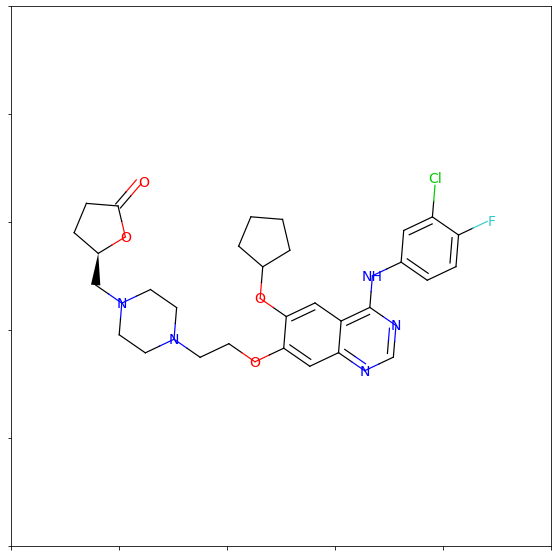

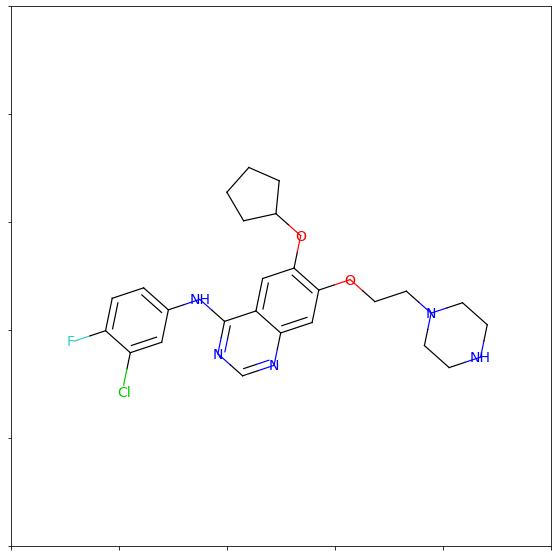

In [6]:
Chem.Draw.MolToMPL(mol1)
Chem.Draw.MolToMPL(mol2)
pass

In [7]:
import numpy as np

create adjacency list for Y -> X for same smile string

In [8]:
adjacency_list = [[]] * len(X)

x_np = np.array(X)
y_np = np.array(Y)
intersection = set(X).intersection(set(Y))
for i in range(len(Y)):
    if Y[i] in intersection:
        idx_arr = (x_np == Y[i])
        temp_list = []
        for _ in range(sum(idx_arr)):
            x = idx_arr.argmax()
            temp_list.append(x)
            idx_arr[x] = 0
        adjacency_list[i] = list(temp_list)

Find length of longest string

In [18]:
def len_longest_path(idx, seen_strings = []):
    '''
    idx: index in Y to start from
    '''
    if len(adjacency_list[idx]) == 0:
        return 1
    if Y[idx] in seen_strings:
        print(seen_strings)
        return 1
    seen_strings.extend([X[idx], Y[idx]])
    return max([len_longest_path(ele, seen_strings) for ele in adjacency_list[idx]]) + 1

In [19]:
for i in range(len(X)):
    l = len_longest_path(i, [])
    if l > 1:
        print(i, l)

48 2
['OC/C=C/c1ccc(-n2cccn2)nc1', 'O=C/C=C/c1ccc(-n2cccn2)nc1']
66 2
145 2
238 2
572 2
635 2
646 2
682 2
760 2
860 2
1080 2
1133 2
1292 2
1444 2
1474 2
1555 2
1641 2
1678 2
1679 2
1692 2
1905 2
2011 2
2027 2
2044 2
2211 2
2438 2
2518 2
2603 2
2745 2
2988 2
3014 2
3152 2
3302 2
3325 2
3396 2
3467 2
3593 2
3733 2
3807 2
3813 2
3856 2
3944 2
3951 2
4078 2
4403 2
4464 2
4465 2
4649 2
4751 2
4996 2
5166 2
5188 2
5244 2
5272 2
5507 2
6089 2
6181 2
6245 2
6507 2
6532 2
6730 2
6901 2
6946 2
7277 2
7314 2
7341 2
7432 2
7446 2
7697 2
8018 2
8195 2
8317 2
8428 2
8509 2
8555 2
8586 2
8772 2
8836 2
8914 2
['O=C/C=C/c1ccc(-n2cccn2)nc1', 'OC/C=C/c1ccc(-n2cccn2)nc1']
8941 2
9042 2
9506 2
['CC1(C)CC(N)CC(C)(CN)C1', 'CC1(C)CC(N)CC(C)(CN)C1']
9517 2
9551 2
9716 2
9729 2
9769 2
9786 2
9994 2
10222 2
10237 2
10255 2
10286 2
10471 2
10654 2
10658 2
10750 2
10829 2
10987 2
11063 2
11099 2
11118 2
11131 2
11236 2
11417 2
11452 2
11540 2
11651 2
11773 2
11785 2
11808 2
11879 2
11884 2
12181 2
['OC(c1ccccc1)c1